In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# read and set directory for dataset for any OS
os.chdir('/Users/home/Library/CloudStorage/OneDrive-UniversityofKansas/RUDRO/Study Documents/FALL-23/Advanced Data Science/Final Project/Crimson-Insights-A-Comprehensive-Analysis-of-Crime-Dynamics-in-the-Heartland-KS/Datasets')

# read the dataset
df = pd.read_csv('merged_kansas_state_2007_2020.csv')

In [3]:
df.head()

,Unnamed: 0,Type,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,City name,Latitude,Longitude
0,0,Murders,1.0,3.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,Hutchinson,38.060844,-97.929771
1,1,Rapes,19.0,28.0,34.0,25.0,22.0,26.0,43.0,32.0,43.0,35.0,40.0,37.0,26.0,11.0,Hutchinson,38.060844,-97.929771
2,2,Robberies,22.0,21.0,23.0,35.0,28.0,24.0,27.0,21.0,26.0,24.0,36.0,18.0,20.0,4.0,Hutchinson,38.060844,-97.929771
3,3,Assaults,187.0,220.0,206.0,184.0,183.0,211.0,182.0,152.0,186.0,126.0,165.0,115.0,107.0,66.0,Hutchinson,38.060844,-97.929771
4,4,Burglaries,432.0,468.0,417.0,589.0,503.0,503.0,437.0,381.0,261.0,431.0,429.0,360.0,260.0,79.0,Hutchinson,38.060844,-97.929771


In [4]:
df.shape

(90, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   Type        90 non-null     object 
 2   2007        90 non-null     float64
 3   2008        90 non-null     float64
 4   2009        90 non-null     float64
 5   2010        90 non-null     float64
 6   2011        90 non-null     float64
 7   2012        90 non-null     float64
 8   2013        90 non-null     float64
 9   2014        90 non-null     float64
 10  2015        90 non-null     float64
 11  2016        90 non-null     float64
 12  2017        90 non-null     float64
 13  2018        90 non-null     float64
 14  2019        90 non-null     float64
 15  2020        90 non-null     float64
 16  City name   90 non-null     object 
 17  Latitude    90 non-null     float64
 18  Longitude   90 non-null     float64
dtypes: float64(16), int64(1), objec

In [6]:
# dropping the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,Type,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,City name,Latitude,Longitude
0,Murders,1.0,3.0,0.0,2.0,1.0,1.0,3.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,Hutchinson,38.060844,-97.929771
1,Rapes,19.0,28.0,34.0,25.0,22.0,26.0,43.0,32.0,43.0,35.0,40.0,37.0,26.0,11.0,Hutchinson,38.060844,-97.929771
2,Robberies,22.0,21.0,23.0,35.0,28.0,24.0,27.0,21.0,26.0,24.0,36.0,18.0,20.0,4.0,Hutchinson,38.060844,-97.929771
3,Assaults,187.0,220.0,206.0,184.0,183.0,211.0,182.0,152.0,186.0,126.0,165.0,115.0,107.0,66.0,Hutchinson,38.060844,-97.929771
4,Burglaries,432.0,468.0,417.0,589.0,503.0,503.0,437.0,381.0,261.0,431.0,429.0,360.0,260.0,79.0,Hutchinson,38.060844,-97.929771


In [8]:
# checking for null values
df.isnull().sum()

Type         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
City name    0
Latitude     0
Longitude    0
dtype: int64

In [9]:
# checking for duplicate rows
df.duplicated().sum()

0

## Data transformation

In [10]:
# change the year columns to one single year column using wide to long
df = pd.melt(df, id_vars=['Type', 'City name', 'Latitude', 'Longitude'], value_vars=['2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020'], var_name='Year')


In [11]:
df.head()

,Type,City name,Latitude,Longitude,Year,value
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0


In [12]:
df.head(20)

,Type,City name,Latitude,Longitude,Year,value
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0
5,Thefts,Hutchinson,38.060844,-97.929771,2007,1805.0
6,Auto thefts,Hutchinson,38.060844,-97.929771,2007,104.0
7,Arson,Hutchinson,38.060844,-97.929771,2007,32.0
8,Crime Index,Hutchinson,38.060844,-97.929771,2007,420.0
9,Murders,Kansas,39.106667,-94.676392,2007,20.0


In [13]:
df.shape

(1260, 6)

In [14]:
# rename the value column in df to Count of Types
df.rename(columns={'value':'Count of Types'}, inplace=True)

df.head()

,Type,City name,Latitude,Longitude,Year,Count of Types
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0


In [15]:
# Identify rows where 'Type' contains 'Crime Index'
crime_index_rows = df['Type'].str.contains('Crime Index')

# Create a new DataFrame for 'Crime Index' rows
crime_index_df = df[crime_index_rows]

crime_index_df.head()


,Type,City name,Latitude,Longitude,Year,Count of Types
8,Crime Index,Hutchinson,38.060844,-97.929771,2007,420.0
17,Crime Index,Kansas,39.106667,-94.676392,2007,632.4
26,Crime Index,Lawrence,38.960213,-95.277390,2007,381.8
35,Crime Index,Lenexa,38.953600,94.733600,2007,199.6
44,Crime Index,Olathe,38.881400,94.819100,2007,247.4


In [16]:
# drop the row where 'Type' contains 'Crime Index' value
# create a Boolean mask for the rows to remove
mask = df['Type'] == 'Crime Index'

# select all rows except the ones that contain 'Coca Cola'
df = df[~mask]

In [17]:
# drop the latitude and longitude columns as they are not needed
crime_index_df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

crime_index_df.head()

,Type,City name,Year,Count of Types
8,Crime Index,Hutchinson,2007,420.0
17,Crime Index,Kansas,2007,632.4
26,Crime Index,Lawrence,2007,381.8
35,Crime Index,Lenexa,2007,199.6
44,Crime Index,Olathe,2007,247.4


In [18]:
# rename the value column in crime_index_df to Value of CI
# rename the Type column to Crime Index
crime_index_df.rename(columns={'Count of Types':'Value of CI', 'Type':'Crime Index'}, inplace=True)

crime_index_df.head()


,Crime Index,City name,Year,Value of CI
8,Crime Index,Hutchinson,2007,420.0
17,Crime Index,Kansas,2007,632.4
26,Crime Index,Lawrence,2007,381.8
35,Crime Index,Lenexa,2007,199.6
44,Crime Index,Olathe,2007,247.4


In [19]:
# drop the rows Crime Index, and rename the value column to crime index
crime_index_df.drop('Crime Index', axis=1, inplace=True)

crime_index_df.rename(columns={'Value of CI':'Crime Index'}, inplace=True)

crime_index_df.head()

,City name,Year,Crime Index
8,Hutchinson,2007,420.0
17,Kansas,2007,632.4
26,Lawrence,2007,381.8
35,Lenexa,2007,199.6
44,Olathe,2007,247.4


In [20]:
# join the crime_index_df with df on the right side of the df dataframe, creating a new dataframe called df_new
df_new = pd.merge(df, crime_index_df, how='left', on=['City name', 'Year'])

df_new.head()


,Type,City name,Latitude,Longitude,Year,Count of Types,Crime Index
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0,420.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0,420.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0,420.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0,420.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0,420.0


In [21]:
df_new.shape

(1120, 7)

In [22]:
df_new.isna().sum()

Type              0
City name         0
Latitude          0
Longitude         0
Year              0
Count of Types    0
Crime Index       0
dtype: int64

## EDA

Text(0.5, 1.0, 'Count of Crime Types Boxplot')

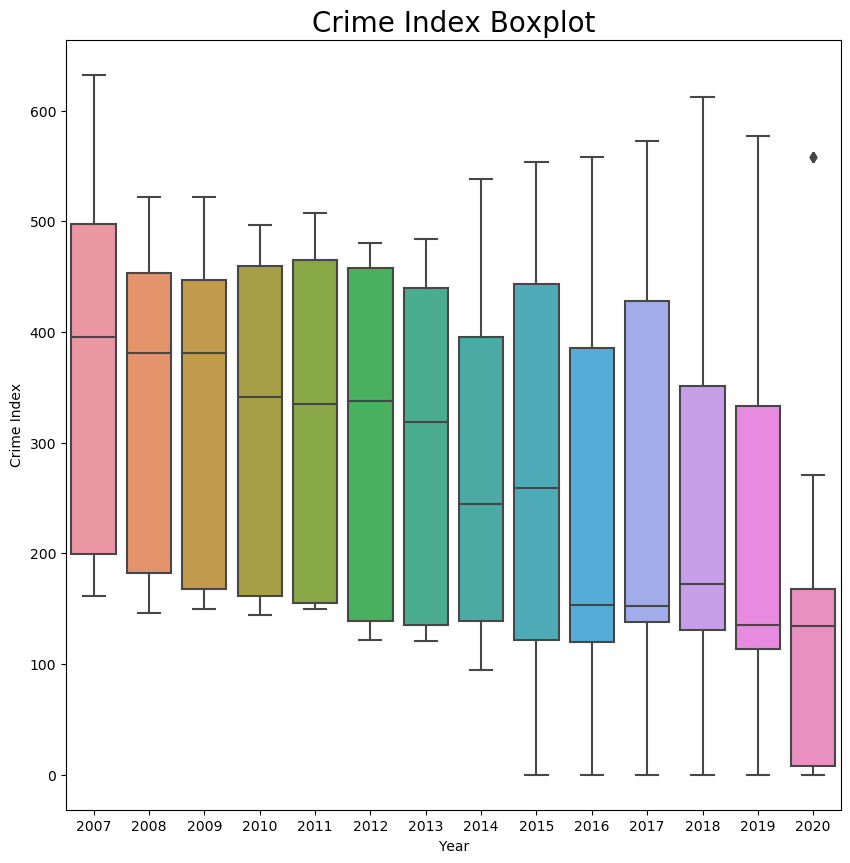

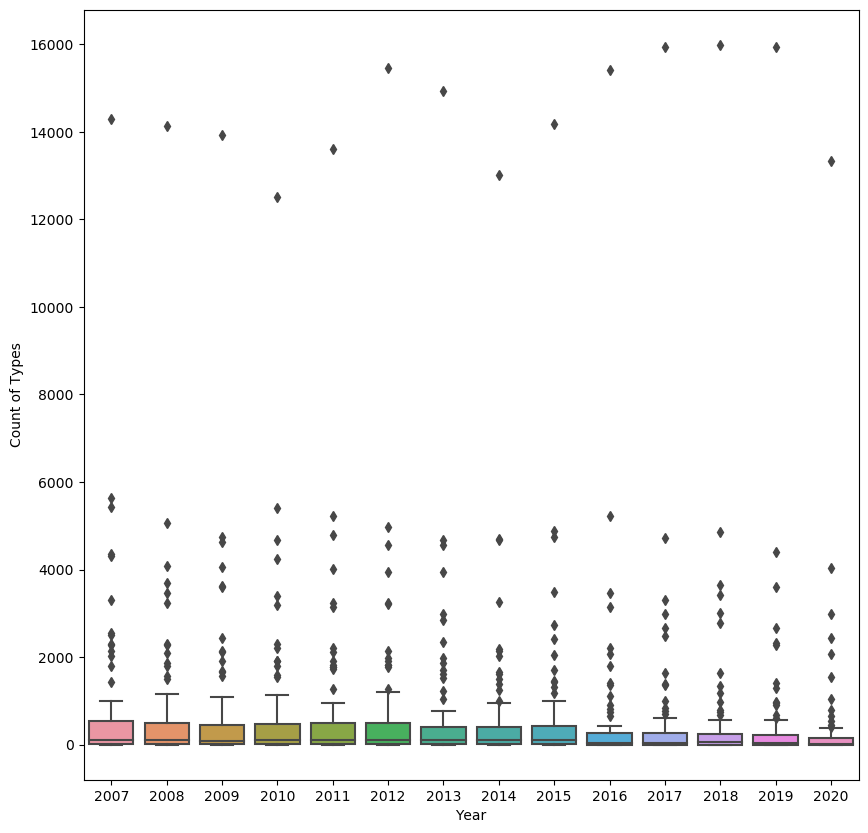

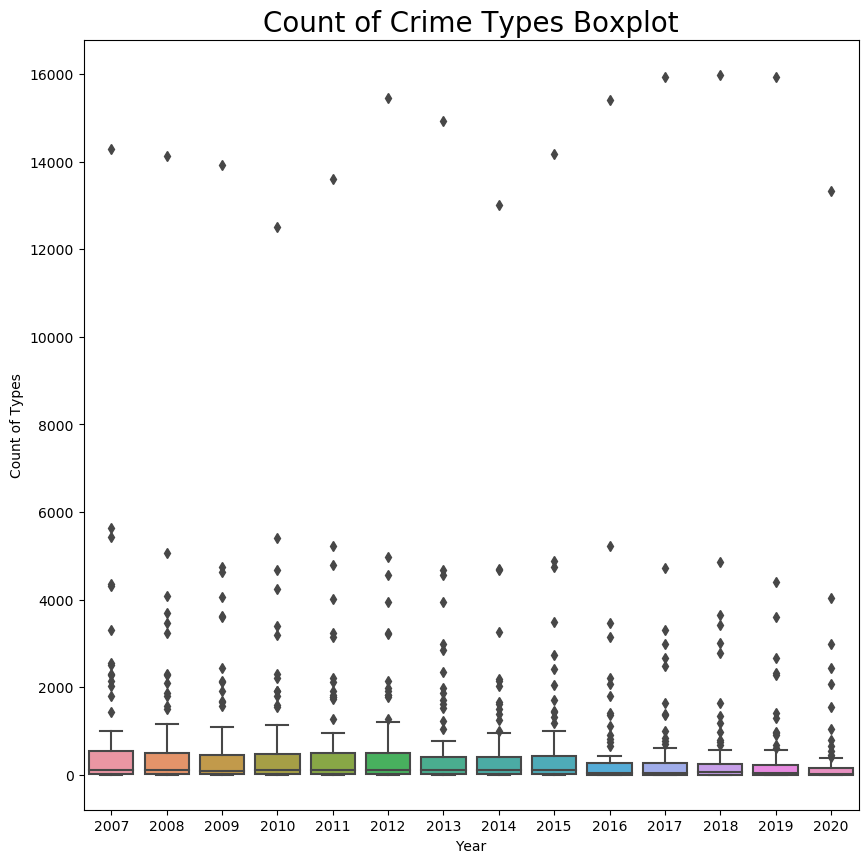

In [23]:
# box plots for crime index
plt.figure(figsize=(10,10))
sns.boxplot(x='Year', y='Crime Index', data=df_new)
plt.title('Crime Index Boxplot', fontsize=20)

# box plots for count of types
plt.figure(figsize=(10,10))
sns.boxplot(x='Year', y='Count of Types', data=df_new)

# box plots for count of types
plt.figure(figsize=(10,10))
sns.boxplot(x='Year', y='Count of Types', data=df_new)
plt.title('Count of Crime Types Boxplot', fontsize=20)

In [24]:
# line plot for crime index
plt.figure(figsize=(10,10))
fig = px.line(x='Year', y='Crime Index', data_frame=df_new, color='City name')
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [25]:
# check if df_new has any crime index values
df_new['Type'].values

array(['Murders', 'Rapes', 'Robberies', ..., 'Thefts', 'Auto thefts',
       'Arson'], dtype=object)

In [26]:
# line plot for Types of Crime
plt.figure(figsize=(18,15))
fig = px.line(x='Year', y='Count of Types', data_frame=df_new, color='Type')
fig.show()

<Figure size 1800x1500 with 0 Axes>

In [29]:
# line plot for Types of Crime
fig = px.line(x='Year', y='Count of Types', data_frame=df_new, color='Type', facet_col='City name')
fig.show()

In [30]:
# circle chart for Types of Crime and their count
fig = px.sunburst(df_new, path=['Year', 'Type'], values='Count of Types')

# Adjust the height and width
fig.update_layout(height=800, width=800)

# Show the plot
fig.show()
